## Shang_Danqin_RNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


#### Import data

In [2]:
import os
os.chdir(r'C:\Users\shang\Desktop\Python\NeuralNets')
data = pd.read_csv("IBM.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-04-30,206.710007,207.960007,206.320007,207.080002,171.139999,2773200
1,2012-05-01,207.179993,208.929993,206.710007,208.000000,171.900360,2715900
2,2012-05-02,206.970001,208.270004,206.910004,208.059998,171.949890,2360300
3,2012-05-03,208.270004,208.919998,206.550003,207.240005,171.272232,2826600
4,2012-05-04,206.470001,207.110001,204.399994,204.990005,169.412750,4023600


#### Scale stock price

In [3]:
stock_price = data.iloc[:,1:2].values
stock_price

array([[ 206.710007],
       [ 207.179993],
       [ 206.970001],
       ..., 
       [ 145.789993],
       [ 146.600006],
       [ 146.839996]])

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
stock_price_scaled =sc.fit_transform(stock_price)
stock_price_scaled 

array([[ 0.91054481],
       [ 0.91539402],
       [ 0.91322737],
       ..., 
       [ 0.28198506],
       [ 0.2903426 ],
       [ 0.29281877]])

#### Train Test Split

In [5]:
train_size = int(len(stock_price_scaled ) * 0.8)
test_size = len(stock_price_scaled ) - train_size
train, test = stock_price_scaled[0:train_size,:], stock_price_scaled[train_size:len(stock_price_scaled ),:]
print(len(train), len(test))

1207 302


In [8]:
x_train = []
y_train = []
for i in range(60,1207):
    x_train.append(train[i-60:i,0])
    y_train.append(train[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train

array([[[ 0.91054481],
        [ 0.91539402],
        [ 0.91322737],
        ..., 
        [ 0.78033422],
        [ 0.73586459],
        [ 0.74762685]],

       [[ 0.91539402],
        [ 0.91322737],
        [ 0.92664052],
        ..., 
        [ 0.73586459],
        [ 0.74762685],
        [ 0.741333  ]],

       [[ 0.91322737],
        [ 0.92664052],
        [ 0.90806847],
        ..., 
        [ 0.74762685],
        [ 0.741333  ],
        [ 0.77414364]],

       ..., 
       [[ 0.44149813],
        [ 0.41229877],
        [ 0.41271157],
        ..., 
        [ 0.59368549],
        [ 0.60916217],
        [ 0.59543949]],

       [[ 0.41229877],
        [ 0.41271157],
        [ 0.42055303],
        ..., 
        [ 0.60916217],
        [ 0.59543949],
        [ 0.6078208 ]],

       [[ 0.41271157],
        [ 0.42055303],
        [ 0.42653737],
        ..., 
        [ 0.59543949],
        [ 0.6078208 ],
        [ 0.62711517]]])

In [24]:
x_test = []
y_test = []
for i in range(60,302):
    x_test.append(test[i-60:i,0])
    y_test.append(test[i,0])
x_test,y_test = np.array(x_test),np.array(y_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test

array([[[ 0.63702016],
        [ 0.6499174 ],
        [ 0.64785387],
        ..., 
        [ 0.35224933],
        [ 0.34244731],
        [ 0.33625673]],

       [[ 0.6499174 ],
        [ 0.64785387],
        [ 0.64114737],
        ..., 
        [ 0.34244731],
        [ 0.33625673],
        [ 0.32851839]],

       [[ 0.64785387],
        [ 0.64114737],
        [ 0.6358852 ],
        ..., 
        [ 0.33625673],
        [ 0.32851839],
        [ 0.33182   ]],

       ..., 
       [[ 0.50546838],
        [ 0.49267442],
        [ 0.46729259],
        ..., 
        [ 0.3037556 ],
        [ 0.27414361],
        [ 0.28941389]],

       [[ 0.49267442],
        [ 0.46729259],
        [ 0.46151465],
        ..., 
        [ 0.27414361],
        [ 0.28941389],
        [ 0.28198506]],

       [[ 0.46729259],
        [ 0.46151465],
        [ 0.4461411 ],
        ..., 
        [ 0.28941389],
        [ 0.28198506],
        [ 0.2903426 ]]])

#### Build model

In [10]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [11]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(Dense(units = 1))

In [15]:
regressor.compile(optimizer = 'adam',loss ='mean_squared_error')

In [16]:
regressor.fit(x_train,y_train,epochs = 100,batch_size = 32)

Epoch 1/100
1147/1147 [==============================] - 7s 6ms/step - loss: 0.0641
Epoch 2/100
1147/1147 [==============================] - 5s 4ms/step - loss: 0.0103
Epoch 3/100
1147/1147 [==============================] - 5s 4ms/step - loss: 0.0080
Epoch 4/100
1147/1147 [==============================] - 4s 4ms/step - loss: 0.0076
Epoch 5/100
1147/1147 [==============================] - 4s 4ms/step - loss: 0.0068
Epoch 6/100
1147/1147 [==============================] - 5s 4ms/step - loss: 0.0070
Epoch 7/100
1147/1147 [==============================] - 4s 4ms/step - loss: 0.0065
Epoch 8/100
1147/1147 [==============================] - 4s 4ms/step - loss: 0.0065
Epoch 9/100
1147/1147 [==============================] - 4s 4ms/step - loss: 0.0062
Epoch 10/100
1147/1147 [==============================] - 5s 4ms/step - loss: 0.0062
Epoch 11/100
1147/1147 [==============================] - 5s 4ms/step - loss: 0.0058
Epoch 12/100
1147/1147 [==============================] - 5s 4ms/step - lo

1147/1147 [==============================] - 5s 5ms/step - loss: 0.0015
Epoch 98/100
1147/1147 [==============================] - 5s 5ms/step - loss: 0.0016
Epoch 99/100
1147/1147 [==============================] - 5s 4ms/step - loss: 0.0017
Epoch 100/100
1147/1147 [==============================] - 5s 4ms/step - loss: 0.0017


Predict

In [25]:
predict = regressor.predict(x_test)

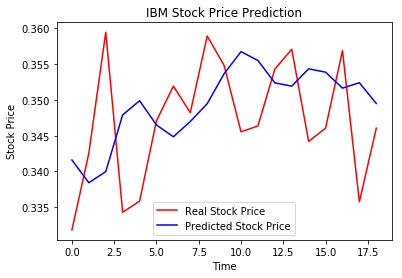

In [26]:
plt.plot(y_test[1:20],color = 'red',label = 'Real Stock Price')
plt.plot(predict[1:20],color = 'blue',label = 'Predicted Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

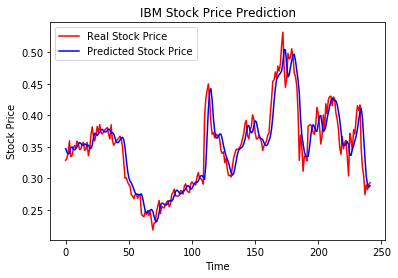

In [27]:
plt.plot(y_test,color = 'red',label = 'Real Stock Price')
plt.plot(predict,color = 'blue',label = 'Predicted Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()